In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv',encoding = 'latin-1')

In [5]:
user_engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [6]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [7]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [10]:
type(user_engagement['time_stamp'][0])

str

In [17]:
#we have to first filter users that have logged in at least 3x:
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])

filtered_user = user_engagement.groupby('user_id').count().reset_index()
filtered_user.head()

,user_id,time_stamp,visited
0,1,1,1
1,2,14,14
2,3,1,1
3,4,1,1
4,5,1,1


In [18]:
filtered_user = filtered_user.drop('visited',axis=1)
filtered_user.columns = ['user_id','count']
filtered_user_3 = filtered_user[filtered_user['count'] >=3]
filtered_user_3.head()

,user_id,count
1,2,14
7,10,284
13,20,7
24,33,18
28,42,342


In [19]:
engaged_users = user_engagement[user_engagement.user_id.isin(filtered_user_3.user_id)]

In [22]:
engaged_users.head(10)

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1
10,2014-02-13 03:45:04,2,1


In [23]:
engaged_users.user_id.unique()

array([    2,    10,    20, ..., 11981, 11988, 11991])

In [41]:
#adopted users based on 3 days login within 7 days rolling period:
adopted_users = []
for user in engaged_users.user_id.unique():
    times_per_user = engaged_users[engaged_users.user_id == user]['time_stamp'].reset_index()['time_stamp']
    
    for time in range(len(times_per_user)-2):
        if times_per_user[time + 2] - times_per_user[time] < pd.Timedelta('7 days'):
            adopted_users.append(user)
            break

In [43]:
len(adopted_users)

1602

In [44]:
len(engaged_users.user_id.unique())

2248

We can see that there are only 1602 users that are 'adopted users' , having 3 times log in within a 7 day period.

In [46]:
users['adopted_user'] = users.apply(lambda x:x['object_id'] in adopted_users,axis=1).astype(np.int8)

In [47]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [48]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user'],
      dtype='object')

In [49]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
dtype: int64

In [50]:
#fill na with -1
users['last_session_creation_time'].fillna(-1,inplace=True)
users['invited_by_user_id'].fillna(-1,inplace=True)

In [54]:
users.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [69]:
creationsource = pd.get_dummies(users['creation_source'],drop_first=True)
users_2 = users.join(creationsource)
users_2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,0,0,0,0


In [70]:
#convert creation_time to year, month, day, hour
users_2['creation_hour'] = pd.to_datetime(users_2.creation_time).dt.hour
users_2['creation_year'] = pd.to_datetime(users_2.creation_time).dt.year
users_2['creation_month'] = pd.to_datetime(users_2.creation_time).dt.month
users_2['creation_day'] = pd.to_datetime(users_2.creation_time).dt.day

In [71]:
users_2.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user', 'ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP',
       'SIGNUP_GOOGLE_AUTH', 'creation_hour', 'creation_year',
       'creation_month', 'creation_day'],
      dtype='object')

In [72]:
features = ['last_session_creation_time','opted_in_to_mailing_list',
           'enabled_for_marketing_drip','ORG_INVITE','PERSONAL_PROJECTS',
           'SIGNUP','SIGNUP_GOOGLE_AUTH','creation_hour','creation_year',
           'creation_month','creation_day']

In [75]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(users_2,test_size=0.2)

We expect our model to have a baseline of roc auc score of 0.5, as this is what we get from our dummy model.

In [99]:
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest()
k = kbest.fit(train[features],train['adopted_user'])
features_score = k.scores_
features_score = pd.DataFrame(features_score)
features_score.columns = ['score']
features_score.sort_values('score',ascending=False,inplace=True)
features_score.head()

,score
0,621.649820
8,76.500901
4,57.672507
9,14.582583
6,9.411362


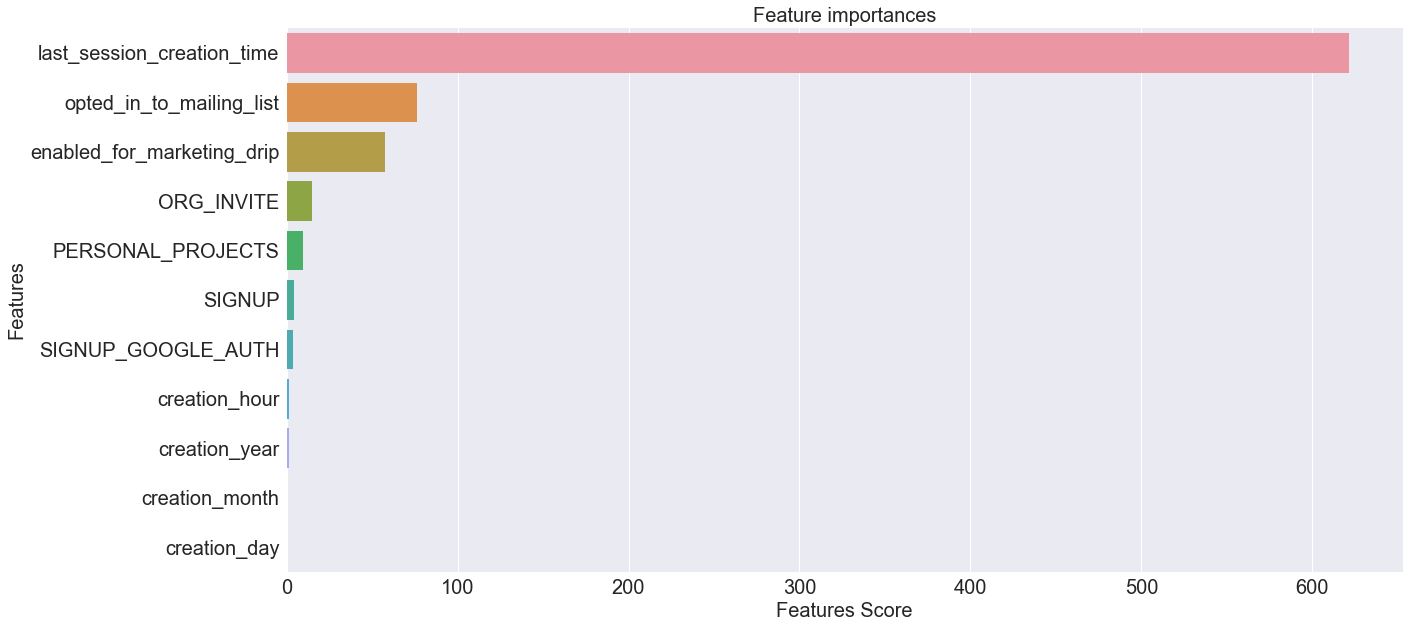

In [103]:
plt.figure(figsize=(20,10))
sns.barplot(x=features_score['score'],y= train[features].columns)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel('Features',size=20)
plt.xlabel('Features Score',size=20)
plt.title('Feature importances',size=20)

From the features importance above, we can see that last session creation time is the most important feature, followed by opted in to mailing list, followed by enabled for marketing drip to predict future adopted customers